# Preamble

In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
import statistics as st
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

In [3]:
solar_metal = 0.0134

# Data

In [4]:
f = open('./Data/stellar_metal_BH.pkl', 'rb')
stellar_metal_BH_data = pickle.load(f)
f.close

f = open('./Data/gas_metal_BH.pkl', 'rb')
gas_metal_BH_data = pickle.load(f)
f.close()

f = open('./Data/stellar_metal.pkl', 'rb')
stellar_metal_data = pickle.load(f)
f.close()

f = open('./Data/gas_metal.pkl', 'rb')
gas_metal_data = pickle.load(f)
f.close()

f = open('./Data/gas_metal_prof_cut.pkl', 'rb')
gas_metal_prof_cut_data = pickle.load(f)
f.close()

f = open('./Data/stellar_SFR_data.pkl', 'rb')
SFR_data = pickle.load(f)
f.close()

f = open('./Data/SFR_data.pkl', 'rb')
saved_SFR_data = pickle.load(f)
f.close()

# Main

In [5]:
halo_nums = gas_metal_data['halo_number']

In [6]:
Mstar_all, halo_num = step.calculate_all('Mstar', 'halo_number()')

In [7]:
all_halo_numbers = np.array(gas_metal_data['halo_number'])
halo_with_BH = np.unique(step.calculate_all('host_halo.halo_number()')[0])

BH_halo_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH))
halo_no_BH_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH, invert = True))

In [8]:
with_BH = all_halo_numbers[BH_halo_ind]
no_BH = all_halo_numbers[halo_no_BH_ind]

In [9]:
BH_gas_metal = gas_metal_BH_data['BH_gas_metal']
BH_stellar_metal = stellar_metal_BH_data['BH_stellar_metal']

stellar_metal_all = stellar_metal_data['tot_stellar_metal']
gas_metal_all = gas_metal_data['tot_gas_metal']

no_BH_stellar_metal = stellar_metal_all[halo_no_BH_ind]
no_BH_gas_metal = stellar_metal_all[halo_no_BH_ind]

In [10]:
stellar_mass = stellar_metal_data['tot_stellar_mass']

## Ind

In [11]:
ind1 = np.where((stellar_mass >= 7e8) & (stellar_mass <= 1e9) & (gas_metal_all/solar_metal >= 0.5))
ind2 = np.where((stellar_mass >= 5e8) & (stellar_mass <= 1e9) & (gas_metal_all/solar_metal <= 0.2))

In [12]:
high_num = halo_nums[ind1] 
low_num = halo_nums[ind2]

In [13]:
high_num

array([ 531,  533,  564,  583,  598,  618,  719,  764,  822,  863,  985,
       1262])

In [14]:
high_met = gas_metal_all[ind1]
high_met/solar_metal

array([0.5176007 , 0.59951869, 0.66782607, 0.55529649, 0.6029841 ,
       0.69371718, 0.68536875, 0.64350759, 0.53395527, 1.27692371,
       1.05130366, 0.67050149])

In [15]:
low_met = gas_metal_all[ind2]
low_met/solar_metal

array([0.13585814, 0.09536609, 0.10671718, 0.17534455, 0.18659484,
       0.15782864, 0.16840479, 0.19359005])

In [16]:
low_num

array([274, 314, 385, 431, 447, 456, 480, 482])

In [17]:
halo1 = db.get_halo('cosmo25/%8192/274')
halo1['Mstar']

914034682.1128435

In [18]:
halo1.keys()

['shrink_center',
 'max_radius',
 'Mvir',
 'Mgas',
 'Mbar',
 'Mstar',
 'dustExt_V',
 'dustExt_B',
 'dustExt_K',
 'dustExt_U',
 'dustExt_J',
 'dustExt_I',
 'SFR_histogram',
 'MColdGas',
 'MHIGas',
 'gas_image_sideon',
 'stellar_image_sideon',
 'gas_image_faceon',
 'stellar_image_faceon',
 'gas_image_original',
 'stellar_image_original',
 'SFR_encl_25Myr',
 'SFR_encl_250Myr',
 'gas_inflow_Mdot',
 'gas_outflow_Mdot',
 'gas_inflow_vel',
 'gas_outflow_vel',
 'gas_inflow_vel2',
 'gas_outflow_vel2',
 'gas_inflow_temp',
 'gas_outflow_temp',
 'v_surface_brightness',
 'b_surface_brightness',
 'i_surface_brightness',
 'SF_burstiness_1Myr',
 'SF_burstiness_10Myr',
 'SF_burstiness_100Myr',
 'SF_burstiness_1Gyr',
 'CumSFH',
 'inner_CumSFH',
 'CumSFH',
 'inner_CumSFH',
 'lambda',
 'lambdaE',
 'stellar_age_profile',
 'lambda_gas',
 'lambdaE_gas',
 'vdisp_stars',
 'vdisp_gas',
 'vdisp_dm',
 'AB_R',
 'AB_V',
 'AB_B',
 'AB_K',
 'AB_U',
 'AB_J',
 'AB_I',
 'HIMass_encl',
 'ColdGasMass_encl',
 'dm_density_p

# SFR

In [19]:
def get_time(arr):
    dt = sim["histogram_delta_t_Gyr"]
    time_sfr = np.arange(len(arr)) * dt + dt/2.
    
    return time_sfr

In [20]:
def smooth(arr):
    x = np.convolve(arr, np.ones(10)/10, mode = 'same')
    return x

## High met

In [21]:
halo531 = db.get_halo('cosmo25/%8192/531')
SFR_531 = halo531['SFR_histogram']
SFR_531 = smooth(SFR_531)
time_531 = get_time(SFR_531) #no BH

In [22]:
halo533 = db.get_halo('cosmo25/%8192/533')
SFR_533 = halo533['SFR_histogram']
SFR_533 = smooth(SFR_533)
time_533 = get_time(SFR_533) #no BH

In [23]:
halo764 = db.get_halo('cosmo25/%8192/764')
SFR_764 = halo764['SFR_histogram']
SFR_764 = smooth(SFR_764)
time_764 = get_time(SFR_764) #with BH

## Low met

In [24]:
halo385 = db.get_halo('cosmo25/%8192/385')
SFR_385 = halo385['SFR_histogram']
SFR_385 = smooth(SFR_385)
time_385 = get_time(SFR_385) #with BH

In [25]:
halo431 = db.get_halo('cosmo25/%8192/431')
SFR_431 = halo431['SFR_histogram']
SFR_431 = smooth(SFR_431)
time_431 = get_time(SFR_431) #no BH

# Plots

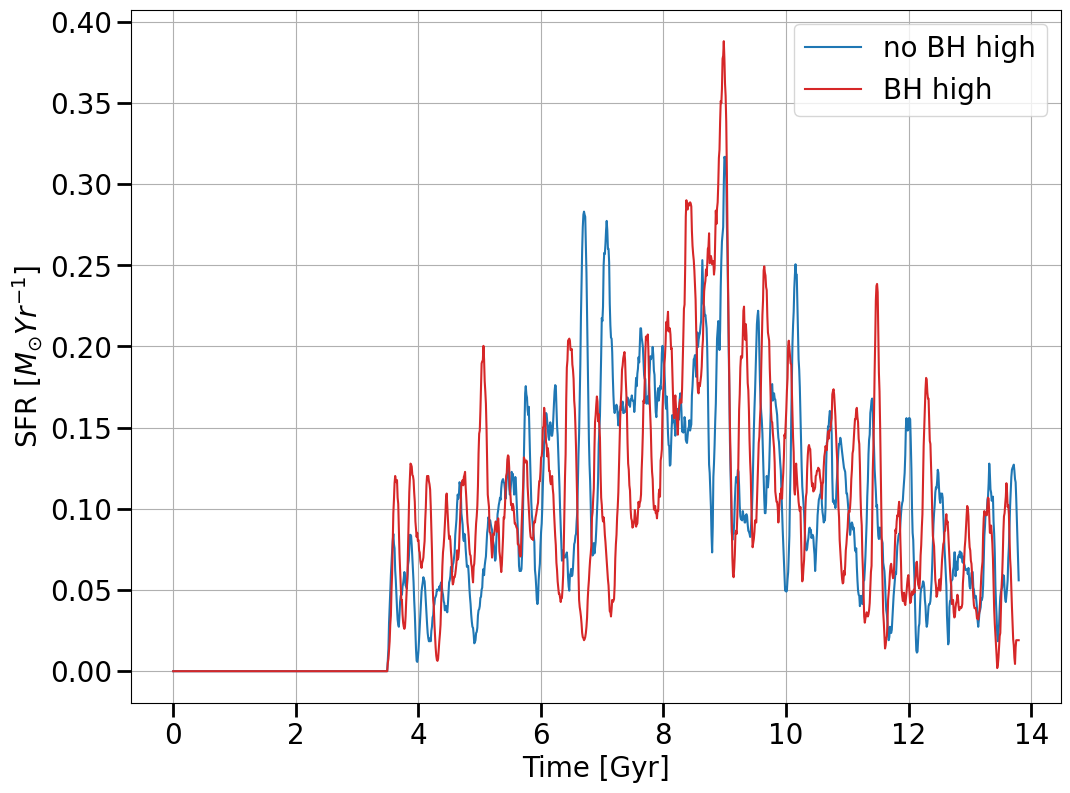

In [26]:
plt.plot(time_531, SFR_531, label = 'no BH high')
plt.plot(time_764, SFR_764, label = 'BH high', color = 'tab:red')

plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/GAS/GAS_SFR_2.png", bbox_inches='tight')

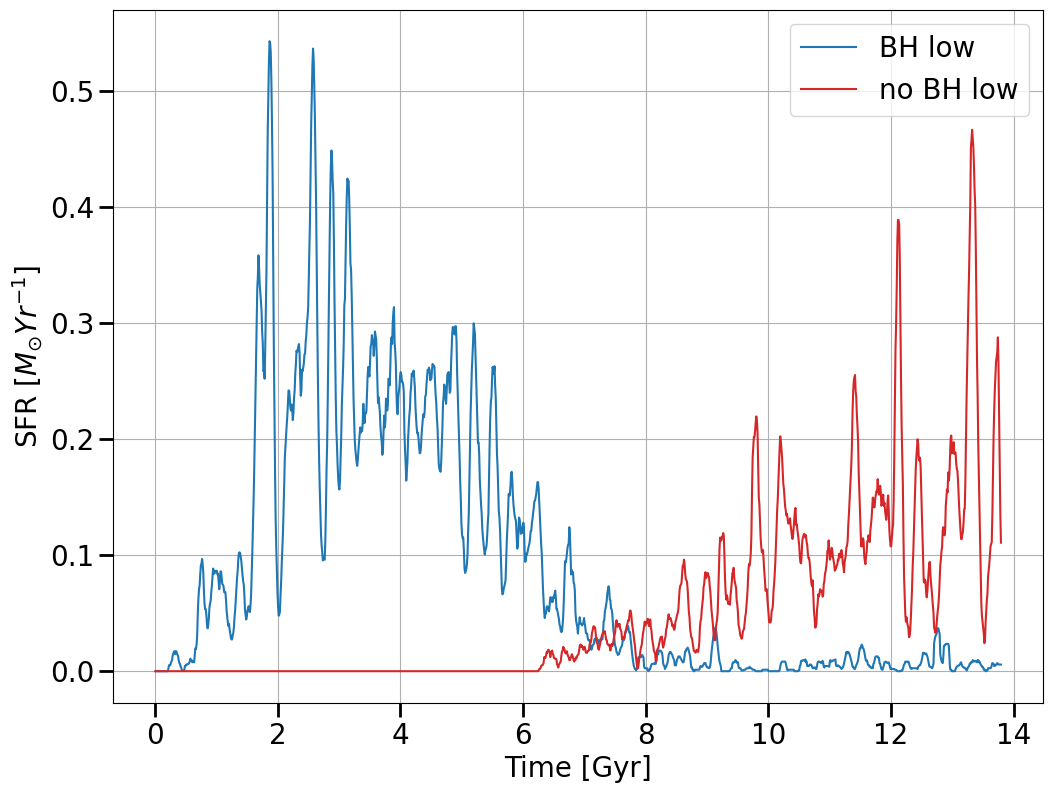

In [27]:
plt.plot(time_385, SFR_385, label = 'BH low')
plt.plot(time_431, SFR_431, label = 'no BH low', color = 'tab:red')

plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/GAS/gas_SFR_1.png", bbox_inches='tight')

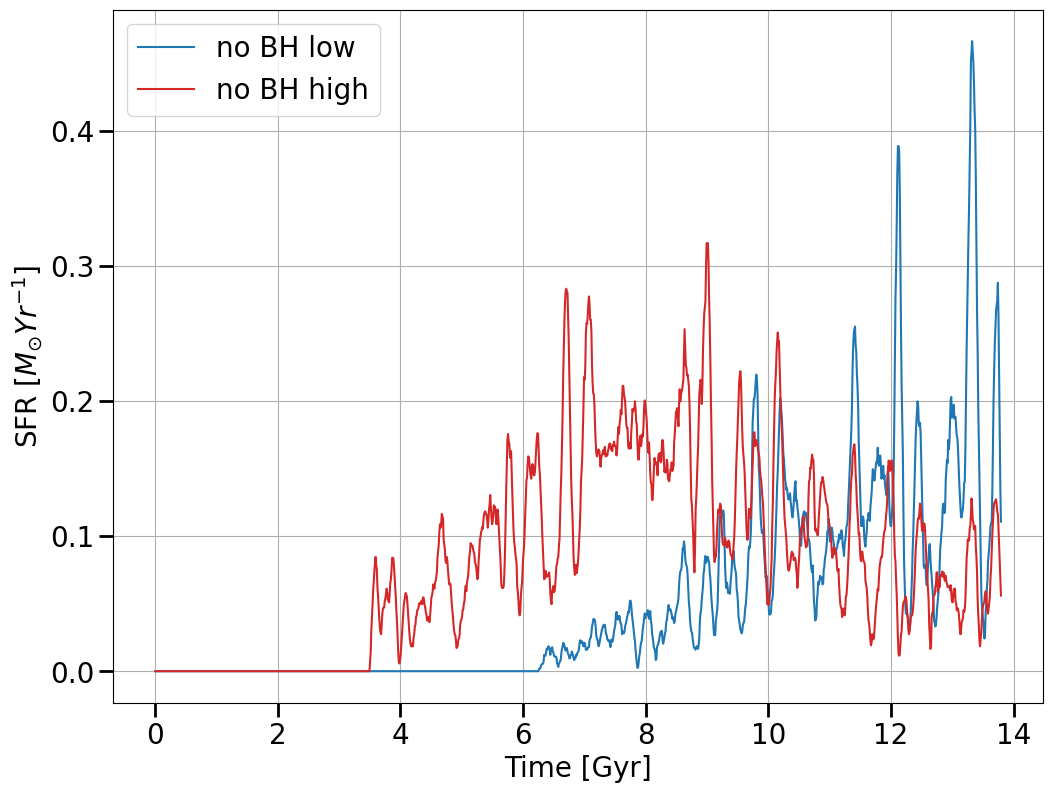

In [28]:
plt.plot(time_431, SFR_431, label = 'no BH low')
plt.plot(time_531, SFR_531, label = 'no BH high', color = 'tab:red')

plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/GAS/gas_SFR_4.png", bbox_inches='tight')

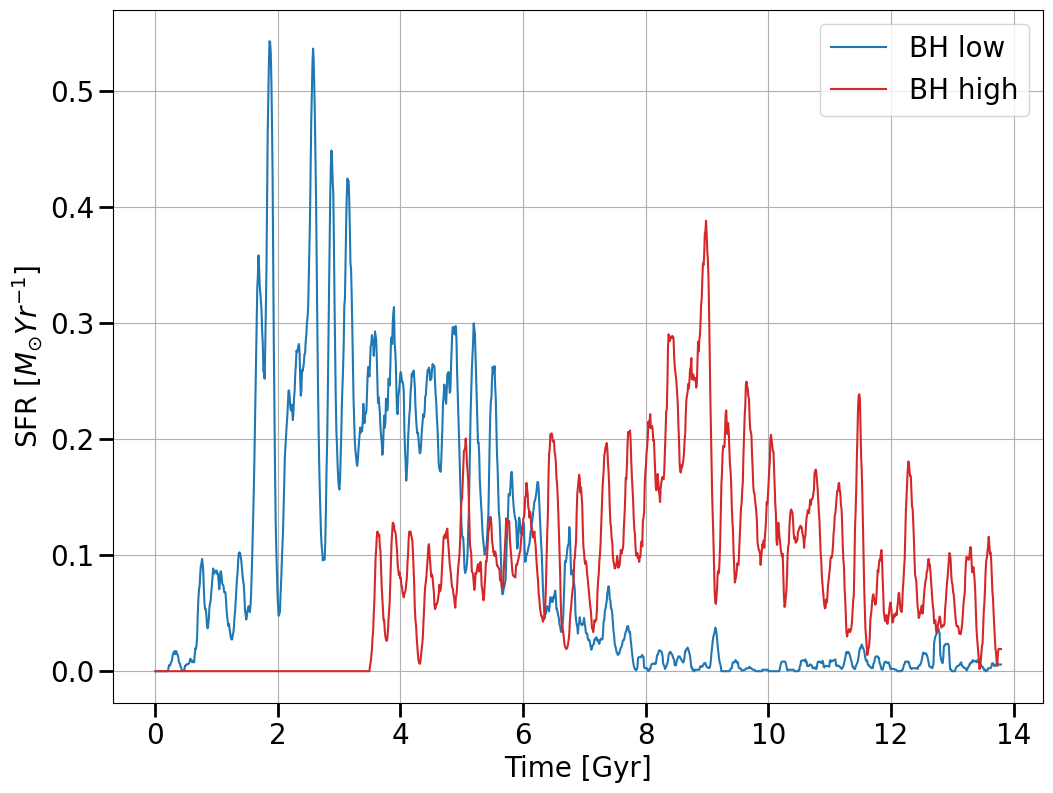

In [29]:
plt.plot(time_385, SFR_385, label = 'BH low')
plt.plot(time_764, SFR_764, label = 'BH high', color = 'tab:red')

plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/GAS/gas_SFR_3.png", bbox_inches='tight')

# Stars

In [30]:
ind1 = np.where((stellar_mass >= 1e9) & (stellar_mass <= 2e9) & (stellar_metal_all/solar_metal >= 0.5))
ind2 = np.where((stellar_mass >= 5e8) & (stellar_mass <= 1e9) & (stellar_metal_all/solar_metal <= 0.25))

In [31]:
shigh_num = halo_nums[ind1]
slow_num = halo_nums[ind2]

In [32]:
shigh_num

array([272, 350, 361, 384, 420, 422, 423, 440, 441, 448, 461, 486, 495,
       497, 504, 506, 509, 514, 565, 578, 620, 627, 669, 693, 745, 758,
       774, 825, 907])

In [33]:
high_met = stellar_metal_all[ind1]
high_met/solar_metal

array([0.53923945, 0.50191772, 0.51207231, 0.60386055, 0.61538004,
       0.55705158, 0.59861911, 0.59383814, 0.53607483, 0.51026266,
       0.53061764, 0.59133236, 0.57291525, 0.53989624, 0.56218963,
       0.64687704, 0.54725322, 0.50207873, 0.50948962, 0.53997325,
       0.5229119 , 0.52058285, 0.57154064, 0.6589506 , 0.58804521,
       0.55467781, 0.62500309, 0.54432901, 0.51370428])

In [34]:
low_met = stellar_metal_all[ind2]
low_met/solar_metal

array([0.22757291, 0.21281904, 0.22069403, 0.22966926, 0.2441238 ,
       0.24303126, 0.19484413, 0.2480447 , 0.23991792, 0.23370486,
       0.2136213 , 0.24618619, 0.22154713, 0.24689694, 0.18192108,
       0.24009738, 0.20502527, 0.19653895, 0.23454272, 0.20398268,
       0.19073076, 0.24232679, 0.23691386, 0.24852123, 0.23580707])

In [35]:
slow_num

array([274, 314, 379, 385, 400, 403, 413, 415, 419, 425, 431, 435, 451,
       453, 456, 471, 480, 482, 492, 498, 520, 540, 547, 576, 675])

In [36]:
halo1 = db.get_halo('cosmo25/%8192/379')
halo1['Mstar']

712270135.570524

In [37]:
halo1.keys()

['shrink_center',
 'max_radius',
 'Mvir',
 'Mgas',
 'Mbar',
 'Mstar',
 'dustExt_V',
 'dustExt_B',
 'dustExt_K',
 'dustExt_U',
 'dustExt_J',
 'dustExt_I',
 'SFR_histogram',
 'MColdGas',
 'MHIGas',
 'gas_image_sideon',
 'stellar_image_sideon',
 'gas_image_faceon',
 'stellar_image_faceon',
 'gas_image_original',
 'stellar_image_original',
 'SFR_encl_25Myr',
 'SFR_encl_250Myr',
 'gas_inflow_Mdot',
 'gas_outflow_Mdot',
 'gas_inflow_vel',
 'gas_outflow_vel',
 'gas_inflow_vel2',
 'gas_outflow_vel2',
 'gas_inflow_temp',
 'gas_outflow_temp',
 'v_surface_brightness',
 'b_surface_brightness',
 'i_surface_brightness',
 'SF_burstiness_1Myr',
 'SF_burstiness_10Myr',
 'SF_burstiness_100Myr',
 'SF_burstiness_1Gyr',
 'CumSFH',
 'inner_CumSFH',
 'CumSFH',
 'inner_CumSFH',
 'lambda',
 'lambdaE',
 'stellar_age_profile',
 'lambda_gas',
 'lambdaE_gas',
 'vdisp_stars',
 'vdisp_gas',
 'vdisp_dm',
 'AB_R',
 'AB_V',
 'AB_B',
 'AB_K',
 'AB_U',
 'AB_J',
 'AB_I',
 'HIMass_encl',
 'ColdGasMass_encl',
 'dm_density_p

# Plots

## High met

In [38]:
halo578 = db.get_halo('cosmo25/%8192/578')
SFR_578 = halo578['SFR_histogram']
SFR_578 = smooth(SFR_578)
time_578 = get_time(SFR_578) #no BH

In [39]:
halo514 = db.get_halo('cosmo25/%8192/514')
SFR_514 = halo514['SFR_histogram']
SFR_514 = smooth(SFR_514)
time_514 = get_time(SFR_514) #with BH

## Low met

In [40]:
halo498 = db.get_halo('cosmo25/%8192/498')
SFR_498 = halo498['SFR_histogram']
SFR_498 = smooth(SFR_498)
time_498 = get_time(SFR_498) #with BH

In [41]:
halo379 = db.get_halo('cosmo25/%8192/379')
SFR_379 = halo379['SFR_histogram']
SFR_379 = smooth(SFR_379)
time_379 = get_time(SFR_379) #with BH

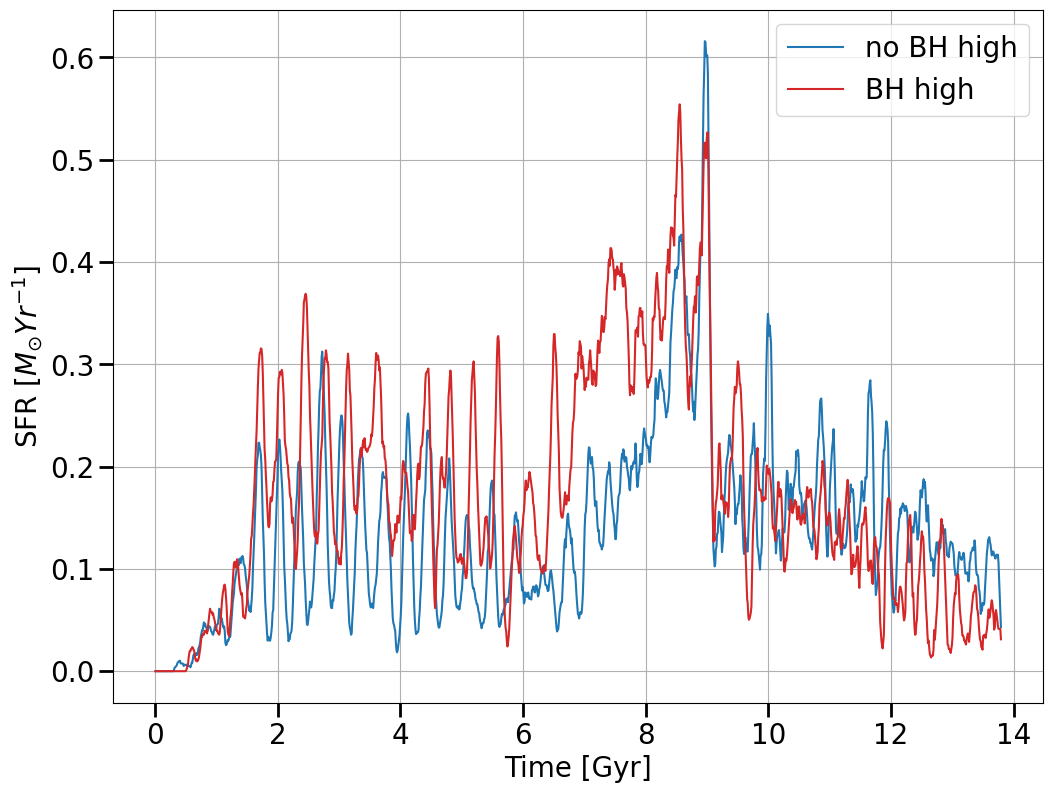

In [42]:
plt.plot(time_578, SFR_578, label = 'no BH high')
plt.plot(time_514, SFR_514, label = 'BH high', color = 'tab:red')

plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/STARS/star_SFR_2.png", bbox_inches='tight')

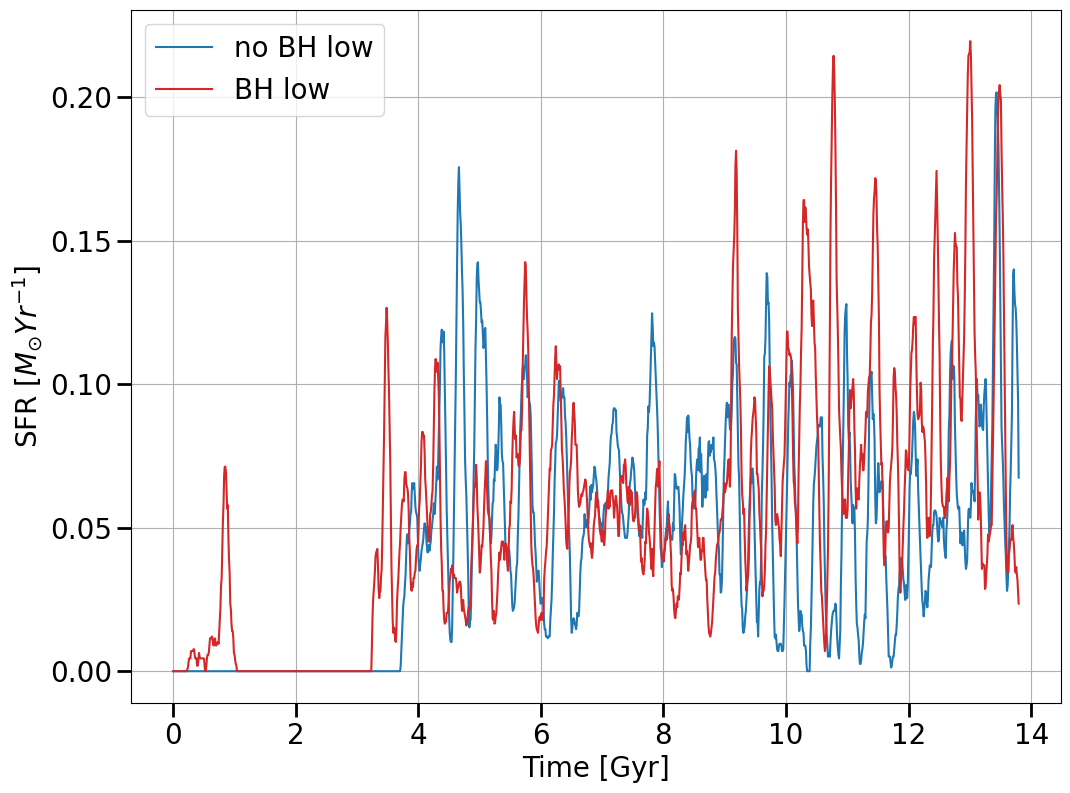

In [43]:
plt.plot(time_379, SFR_379, label = 'no BH low')
plt.plot(time_498, SFR_498, label = 'BH low', color = 'tab:red')

plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/STARS/star_SFR_1.png", bbox_inches='tight')

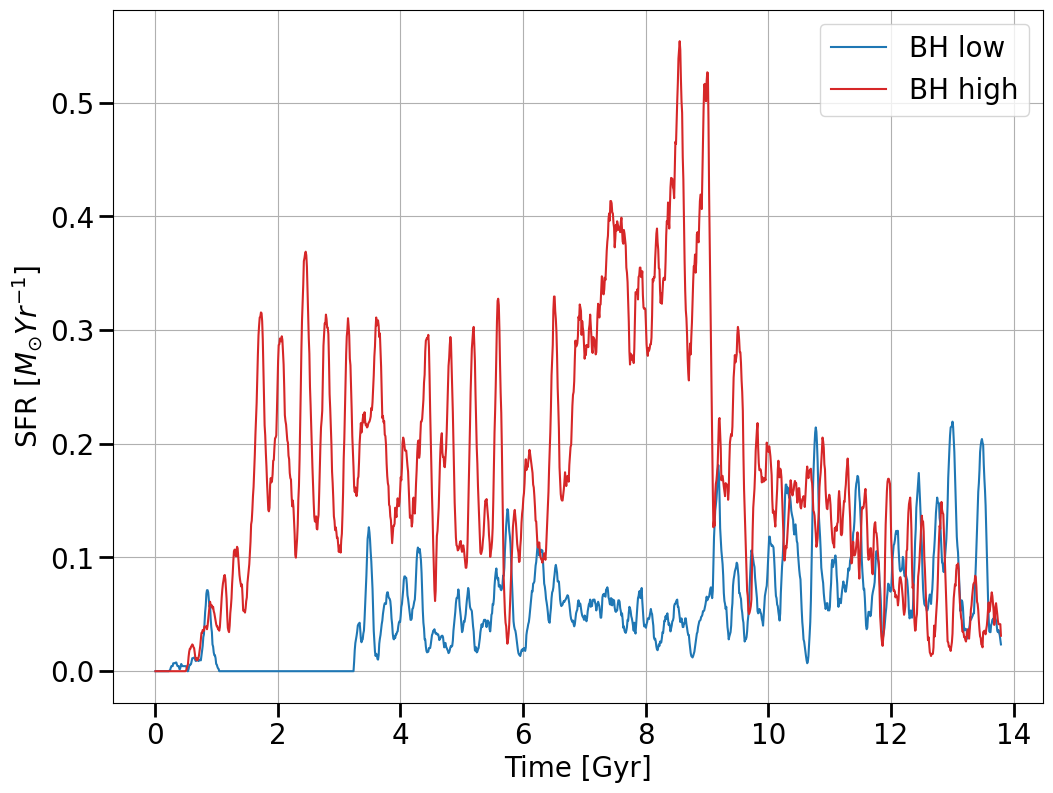

In [44]:
#plt.plot(time_379, SFR_379, label = 'no BH low')
plt.plot(time_498, SFR_498, label = 'BH low', color = 'tab:blue')
#plt.plot(time_578, SFR_578, label = 'no BH high')
plt.plot(time_514, SFR_514, label = 'BH high', color = 'tab:red')

plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/STARS/star_SFR_3.png", bbox_inches='tight')

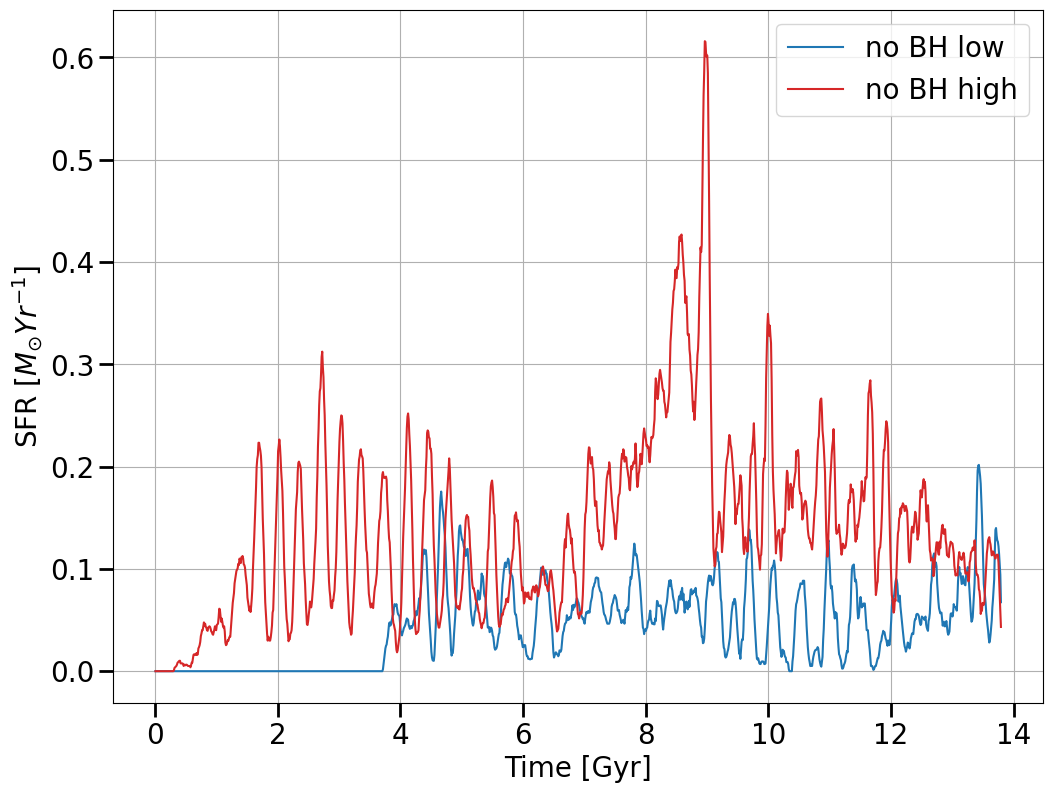

In [45]:
plt.plot(time_379, SFR_379, label = 'no BH low')
#plt.plot(time_498, SFR_498, label = 'BH low', color = 'tab:blue')
plt.plot(time_578, SFR_578, label = 'no BH high', color = 'tab:red')
#plt.plot(time_514, SFR_514, label = 'BH high', color = 'tab:red')

plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/star_SFR_4.png", bbox_inches='tight')

# Something Potentially Daft

In [46]:
stellar_metal_data.keys()

dict_keys(['tot_stellar_mass', 'tot_stellar_metal', 'metal_star_solar', 'halo_number', 'notes'])

In [47]:
halo_number = gas_metal_data['halo_number']
gas_z = gas_metal_data['tot_gas_metal']
star_m = stellar_metal_data['tot_stellar_mass']

In [48]:
SFR_master = saved_SFR_data['SFR_master']

In [49]:
all_SFR = SFR_master[halo_number]

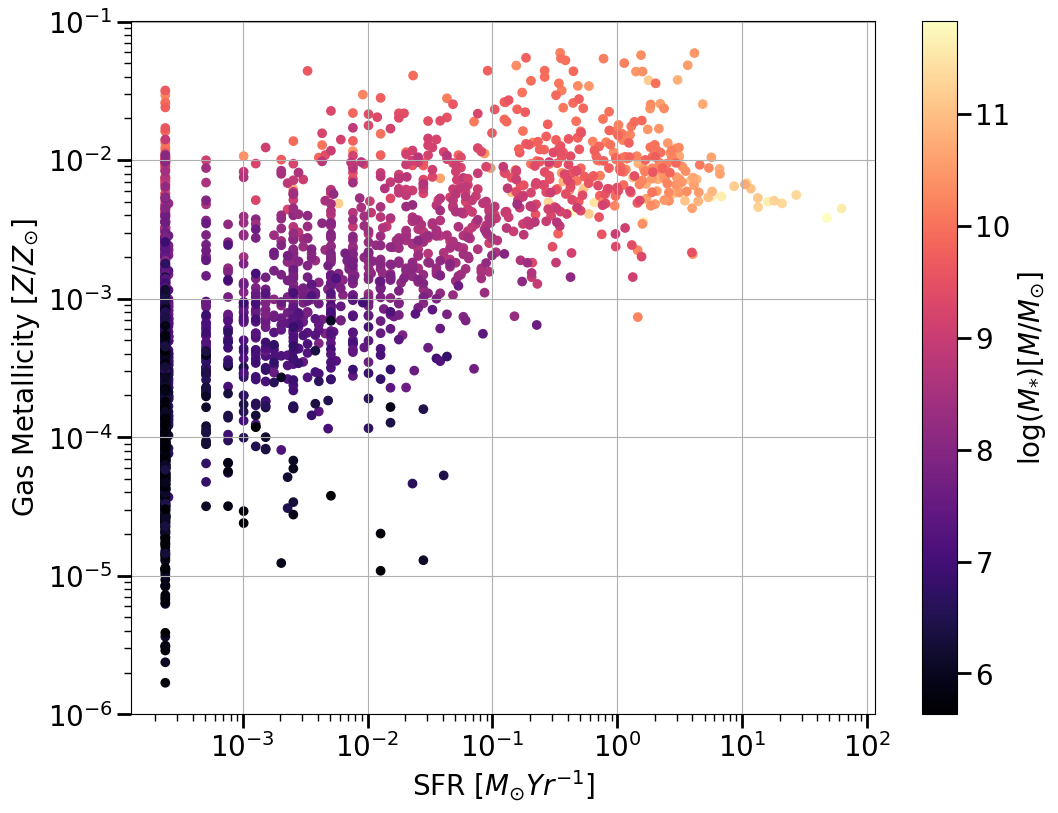

In [50]:
plt.scatter(all_SFR, gas_z, c = np.log10(star_m), cmap = 'magma')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('SFR $[M_{\odot}Yr^{-1}]$')
plt.ylabel('Gas Metallicity $[Z/Z_{\odot}]$')

#plt.xlim(-2, 2)

plt.colorbar(label = 'log($M_{*}$)$[M/M_{\odot}]$')

plt.grid()
#plt.show()
plt.savefig("./Pictures/gvs", bbox_inches='tight')

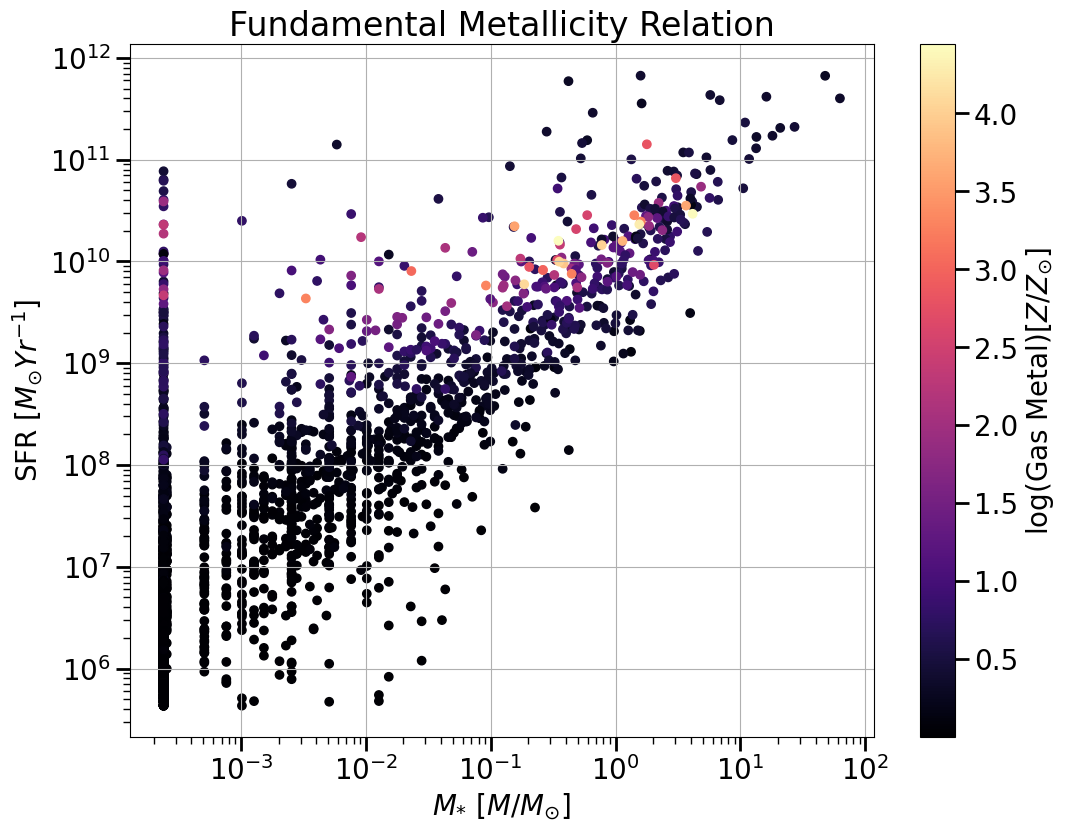

In [51]:
plt.scatter(all_SFR, star_m, c = gas_z/solar_metal, cmap = 'magma')

plt.xscale('log')
plt.yscale('log')

plt.title("Fundamental Metallicity Relation")
plt.xlabel('$M_{*}$ $[M/M_{\odot}]$')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

#plt.xlim(-2, 2)

plt.colorbar(label = 'log(Gas Metal)$[Z/Z_{\odot}]$')

plt.grid()
#plt.show()
plt.savefig("./Pictures/reee", bbox_inches='tight')

In [52]:
print(len(all_SFR))

3057


In [53]:
print(len(star_m))

3057


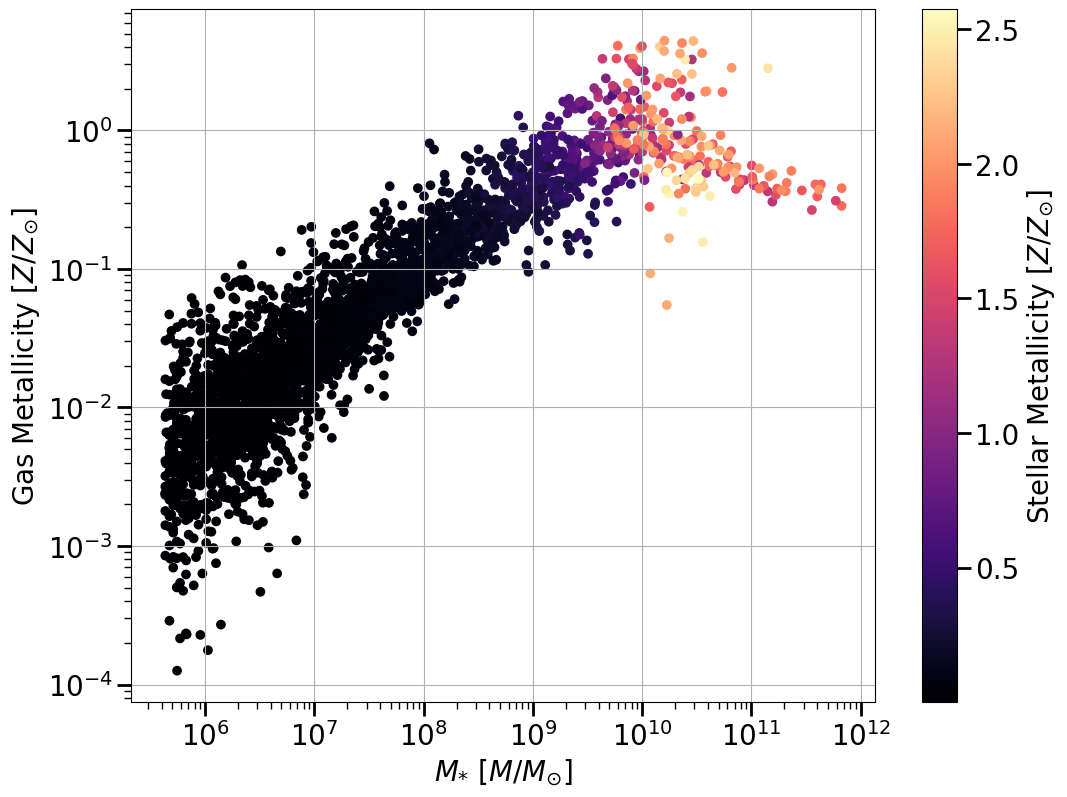

In [54]:
plt.scatter(star_m, gas_z/solar_metal, c = stellar_metal_all/solar_metal, cmap = 'magma')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('$M_{*}$ $[M/M_{\odot}]$')
plt.ylabel('Gas Metallicity $[Z/Z_{\odot}]$')

#plt.xlim(-2, 2)

plt.colorbar(label = 'Stellar Metallicity $[Z/Z_{\odot}]$')

plt.grid()
#plt.show()
plt.savefig("./Pictures/gas_star", bbox_inches='tight')